# Power Analysis

## Here is an example of a power analysis for a simple experiment comparing two treatments. First we specify our assumptions about the magnitude of the residual variance or error in measuring the effect of the treatments, and the degree to which we beleive the two treatments will differ.

In [11]:
#our alternative hypothesis is that trtment two will increase the observed phenotype by x units
diff_trt=4
#based on a pilot experiment or prior knowledge we are assuming residual variance will be approximately 30
res_var=30

## In this example we are going to use the paramerters above to construct the distribution of **diff_trt**, assuming a balanced experiment with appropriate experimental designs.

In [16]:
# replication per treatment
reps=20
diff_trt_var=res_var/reps + res_var/reps
df=2*reps-2
#determing the critical value for a one-side t-tes
z_thresh = qt(.95,df)
# Determining the difference in means that would need to be observed in order to surpase the threshold
critical_value = z_thresh * diff_trt_var**.5
print("Critical Value")
critical_value

[1] "Critical Value"


[1] 2.920159

## Now that we have the critical value we will determine the probability of observing that critical value given the assumed distribution of **diff_trt** under the alternative hypothis (trt 2 > than trt1)

In [17]:
# since I'm going to use a standard, centralized t-distribution I need to center and scale the critical value
centered_cv=(critical_value-diff_trt)/diff_trt_var**.5
centered_cv
power=1-pt(centered_cv,df)
power

[1] -0.6234466

[1] 0.7316422

## Code to calculate power could be placed in a loop over increasing replication to form a power curve.

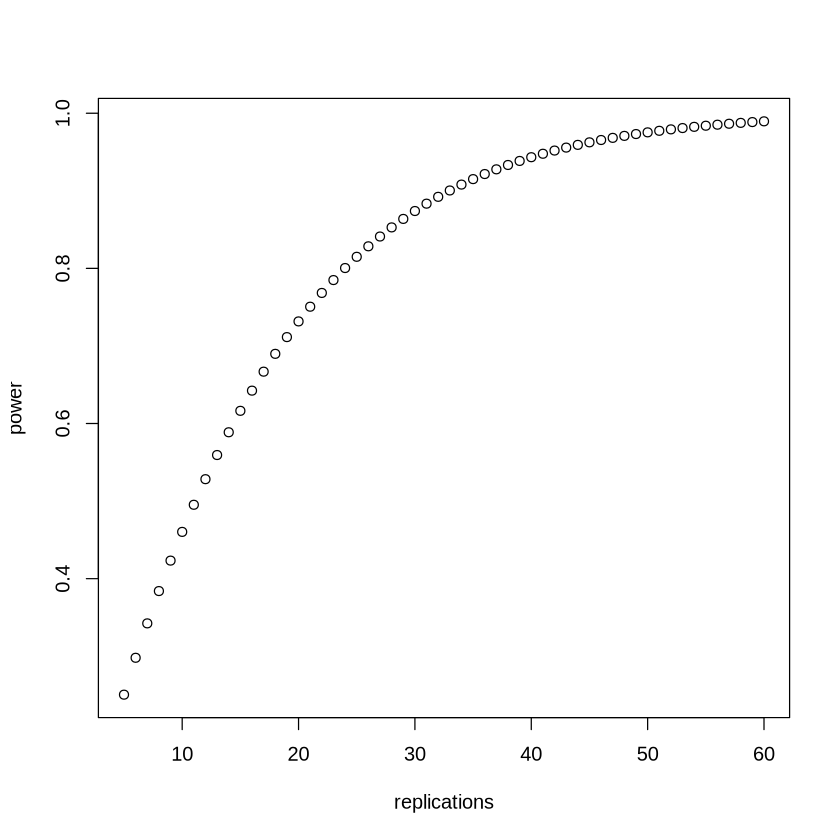

In [19]:
replications=c(5:60)
power=rep(0,length(replications))

for(i in 1:length(replications)){
reps = replications[i]
diff_trt_var=res_var/reps + res_var/reps
df=2*reps-2
#determing the critical value for a one-side t-tes
z_thresh = qt(.95,df)
# Determining the difference in means that would need to be observed in order to surpase the threshold
critical_value = z_thresh * diff_trt_var**.5
centered_cv=(critical_value-diff_trt)/diff_trt_var**.5
centered_cv
power[i]=1-pt(centered_cv,df)
    
}
          

plot(replications, power)

## What is a potential issue with this approach to power calculations?